# Passive degrees of freedom



Passive dofs!

In [1]:
from blop.utils import prepare_re_env

%run -i $prepare_re_env.__file__ --db-type=temp

running iteration 1 / 1


Transient Scan ID: 1     Time: 2024-02-03 16:54:16
Persistent Unique Scan ID: 'b925c3ae-ed3c-427b-8b45-43791a1e7b6c'
New stream: 'primary'
+-----------+------------+------------+------------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |  brownian1 |         x3 |  brownian2 |
+-----------+------------+------------+------------+------------+------------+------------+
|         1 | 16:54:16.8 |     -0.646 |      0.063 |     -0.025 |      0.000 |     -0.078 |


|         2 | 16:54:17.3 |     -0.342 |     -1.736 |     -0.032 |      0.000 |     -0.489 |


|         3 | 16:54:17.8 |      0.907 |     -1.185 |      0.202 |      0.000 |     -0.357 |


|         4 | 16:54:18.2 |      1.327 |     -3.151 |      0.455 |      0.000 |     -0.612 |


|         5 | 16:54:18.6 |      4.050 |     -4.709 |      0.522 |      0.000 |     -0.429 |


|         6 | 16:54:19.0 |      3.183 |     -2.128 |      0.310 |      0.000 |     -0.444 |


|         7 | 16:54:19.5 |      2.859 |      1.076 |      0.191 |      0.000 |     -0.660 |


|         8 | 16:54:19.9 |      5.000 |      3.339 |      0.127 |      0.000 |     -0.653 |


|         9 | 16:54:20.3 |      2.255 |      4.896 |     -0.118 |      0.000 |     -0.637 |


|        10 | 16:54:20.8 |      0.604 |      2.018 |     -0.085 |      0.000 |     -0.703 |


|        11 | 16:54:21.2 |     -1.495 |      3.103 |     -0.011 |      0.000 |     -0.823 |


|        12 | 16:54:21.6 |     -3.750 |      4.034 |     -0.009 |      0.000 |     -1.221 |


|        13 | 16:54:22.1 |     -3.391 |      1.629 |     -0.242 |      0.000 |     -1.092 |


|        14 | 16:54:22.5 |     -3.067 |     -0.166 |     -0.395 |      0.000 |     -1.272 |


|        15 | 16:54:23.0 |     -4.700 |     -2.918 |     -0.621 |      0.000 |     -0.802 |


|        16 | 16:54:23.4 |     -2.424 |     -3.852 |     -0.747 |      0.000 |     -0.975 |


+-----------+------------+------------+------------+------------+------------+------------+
generator list_scan ['b925c3ae'] (scan num: 1)


/usr/share/miniconda3/envs/blop-py3.10/lib/python3.10/site-packages/bluesky/callbacks/fitting.py:167: RuntimeWarning: invalid value encountered in scalar divide
  np.sum(input * grids[dir].astype(float), labels, index) / normalizer





trained model 'himmelblau' in 129 ms


('b925c3ae-ed3c-427b-8b45-43791a1e7b6c',)

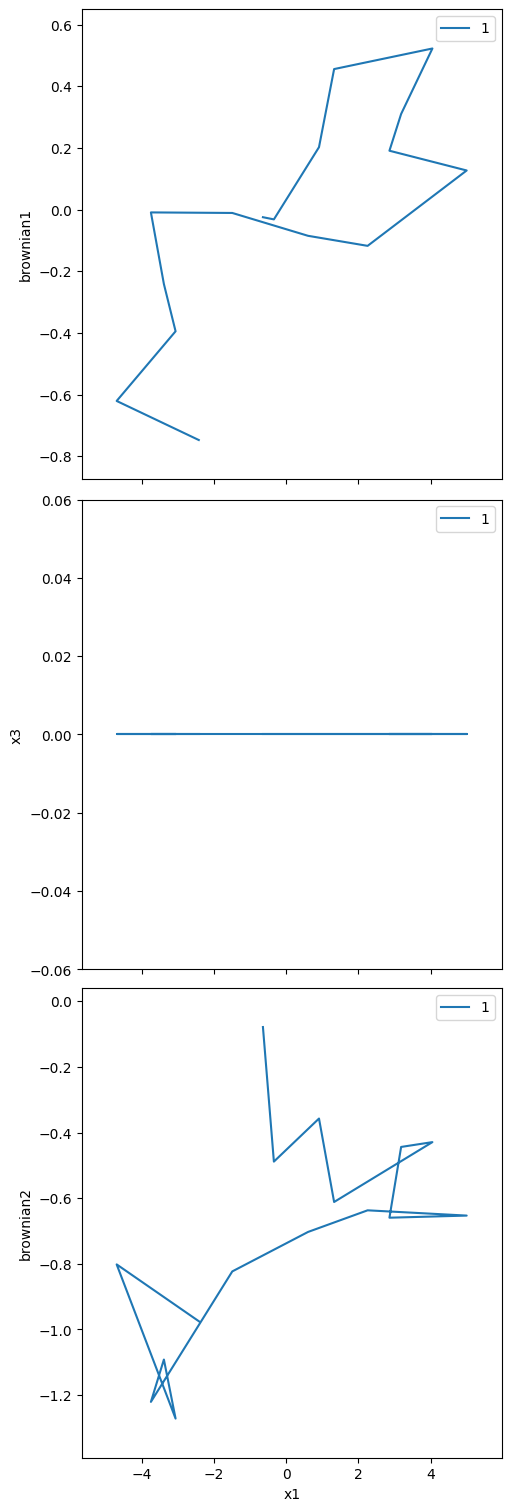

In [2]:
from blop.utils import functions
from blop import DOF, Agent, Objective
from blop.dofs import BrownianMotion


dofs = [
    DOF(name="x1", search_bounds=(-5.0, 5.0)),
    DOF(name="x2", search_bounds=(-5.0, 5.0)),
    DOF(name="x3", search_bounds=(-5.0, 5.0), active=False),
    DOF(device=BrownianMotion(name="brownian1"), read_only=True),
    DOF(device=BrownianMotion(name="brownian2"), read_only=True, active=False),
]

objectives = [
    Objective(name="himmelblau", target="min"),
]

agent = Agent(
    dofs=dofs,
    objectives=objectives,
    digestion=functions.constrained_himmelblau_digestion,
    db=db,
    verbose=True,
    tolerate_acquisition_errors=False,
)

RE(agent.learn("qr", n=16))

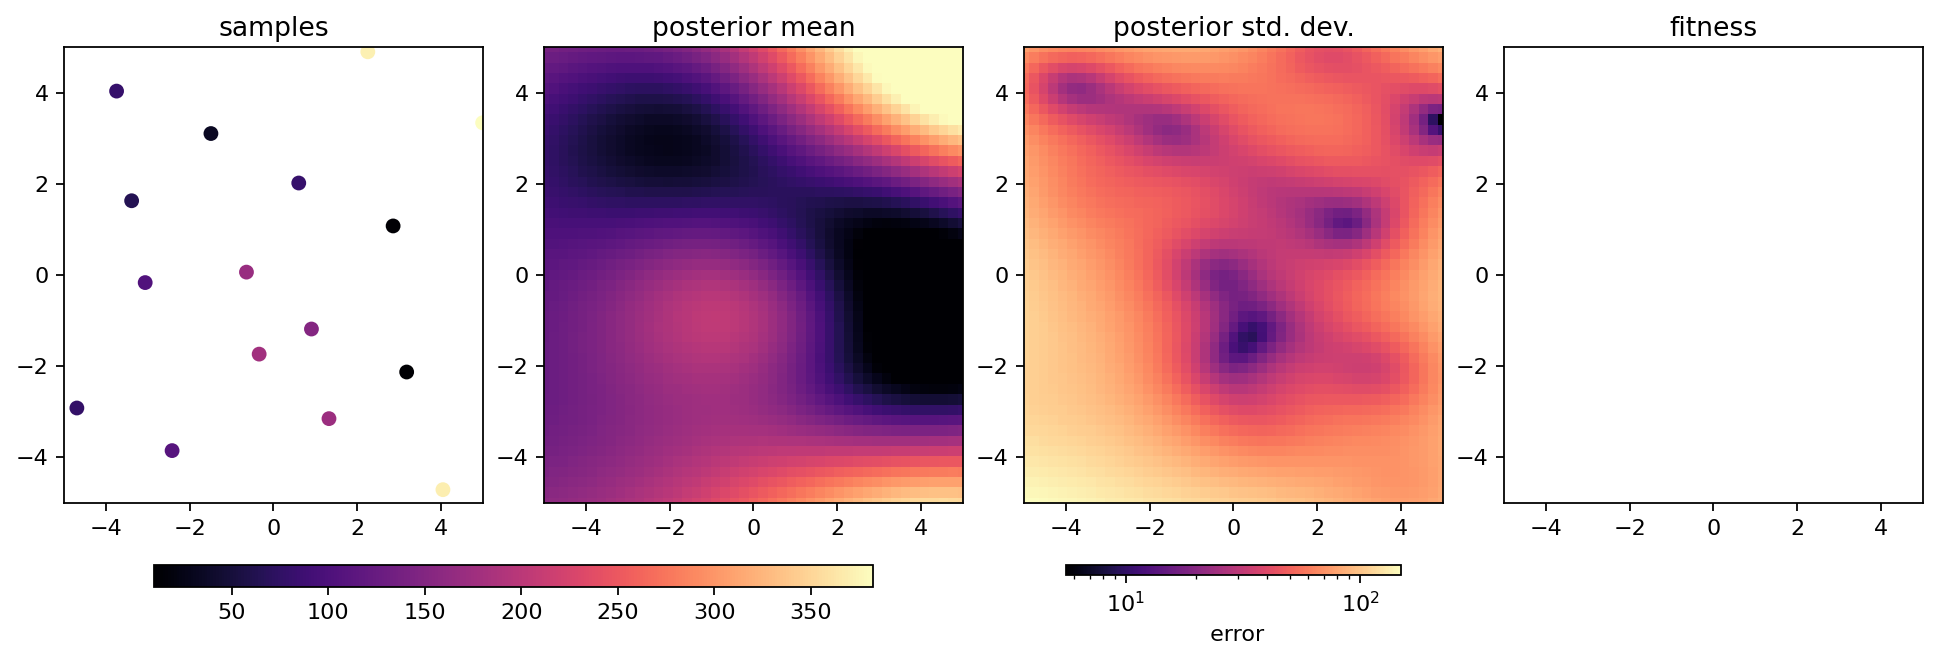

In [3]:
agent.plot_objectives()